# Airbnb Data Analysis: Analyzing Seattle and Boston

## Introduction

This project analyzes Airbnb listings from Seattle and Boston. The goal is to identify patterns in pricing, availability, and reviews, and compare key metrics between the two cities.

## Business Questions

- What factors most influence the price of Airbnb accommodations?
- What are the most valued amenity combinations, considering average price and high demand?
- How do guest preferences for amenities differ between properties with high ratings and low ratings in Seattle and Boston?

## Data Understanding

**1. What factors most influence the price of Airbnb accommodations?**

   To answer this question, we need to access the listings datasets (Seattle and Boston) and identify the variables that significantly influence the price of Airbnb accommodations through correlation analysis and regression modeling.
    
**2. What are the most valued amenity combinations, considering average price and high demand?**

   Here, I exploded the amenities and combined then into groups to identify which combinations of amenities add the most value to accommodations in terms of price and demand.

**3. How do guest preferences for amenities differ between properties with high ratings and low ratings in Seattle and Boston?**

   Compared the frequency of amenities between high-rated and low-rated properties in Seattle and Boston to uncover differences in guest preferences.

## Data Import and Initial Exploration

This section imports the necessary libraries and loads the Seattle and Boston datasets, which include information about listings, reservation calendars, and reviews. It also provides an initial exploration of the data by checking the dimensions and previewing the structure of the datasets.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from scipy.stats import chi2_contingency

In [5]:
# Load Seattle and Boston datasets
# These datasets include information about listings, reservation calendars, and reviews

# Seattle Dataset
seattle_listings = pd.read_csv('./datasets/seattle/listings.csv')
seattle_calendar = pd.read_csv('./datasets/seattle/calendar.csv')
seattle_reviews = pd.read_csv('./datasets/seattle/reviews.csv')

# Boston Dataset
boston_listings = pd.read_csv('./datasets/boston/listings.csv')
boston_calendar = pd.read_csv('./datasets/boston/calendar.csv')
boston_reviews = pd.read_csv('./datasets/boston/reviews.csv')

In [6]:
# Check the number of rows and columns in the Seattle and Boston datasets
# This helps to understand the structure of the data

# Seattle Datasets Shape
print(seattle_listings.shape)
print(seattle_calendar.shape)
print(seattle_reviews.shape)

# Boston Datasets Shape
print(boston_listings.shape)
print(boston_calendar.shape)
print(boston_reviews.shape)

(3818, 92)
(1393570, 4)
(84849, 6)
(3585, 95)
(1308890, 4)
(68275, 6)


In [7]:
seattle_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [8]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Data Cleaning and Preprocessing

This section focuses on cleaning and preprocessing the Seattle and Boston datasets to ensure consistency and usability for further analysis. Key steps include:

### 1. **Data Cleaning**
- **Remove Columns with Null or Constant Values**
- **Ensure Consistency Between Datasets**
- **Remove Columns with Excessive Missing Data**


This process ensures the dataset is cleaned, consistent, and ready for exploratory analysis or modeling.

### 1.1 **Identify and Remove Null Columns**:
   - Columns with all null values are identified and removed as they do not contribute any information.

In [12]:
# Identify columns with only null values in the Seattle and Boston datasets
# This helps to decide which columns can be discarded
seattle_null_columns = seattle_listings.columns[seattle_listings.isnull().all()]
boston_null_columns = boston_listings.columns[boston_listings.isnull().all()]

print(seattle_null_columns)
print(boston_null_columns)

Index(['license'], dtype='object')
Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


In [13]:
seattle_listings.drop(columns = seattle_null_columns, inplace = True)
boston_listings.drop(columns = boston_null_columns, inplace = True)

### 1.2 **Ensure Consistency Between Datasets**:
   - Columns not common to both datasets are removed to maintain a consistent structure for analysis.

In [15]:
# Remove columns that are not common to both datasets (Seattle and Boston)
# This ensures that the datasets have a consistent structure for further analysis and modeling
seattle_columns_removed = list(set(seattle_listings.columns) - set(boston_listings.columns))
boston_columns_removed = list(set(boston_listings.columns) - set(seattle_listings.columns))

print(seattle_columns_removed)
print(boston_columns_removed)

['neighbourhood_group_cleansed', 'has_availability', 'jurisdiction_names']
['access', 'interaction', 'house_rules']


In [16]:
seattle_listings.drop(columns = seattle_columns_removed, inplace = True)
boston_listings.drop(columns = boston_columns_removed, inplace = True)

In [17]:
set(seattle_listings.columns) == set(boston_listings.columns)

True

### 1.3 **Remove Constant Value Columns**:
   - Columns with constant values across all rows are removed as they provide no variability or insights.

In [19]:
# Remove columns that have constant values across all rows
# These columns do not provide any useful information for modeling or analysis
seattle_constant_columns = [col for col in seattle_listings.columns if seattle_listings[col].nunique() == 1]
boston_constant_columns = [col for col in boston_listings.columns if boston_listings[col].nunique() == 1]

print(seattle_constant_columns)
print(boston_constant_columns)

['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'calendar_last_scraped', 'requires_license']
['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'country_code', 'country', 'calendar_last_scraped', 'requires_license']


In [20]:
seattle_listings.drop(columns = seattle_constant_columns, inplace = True)
boston_listings.drop(columns = boston_constant_columns, inplace = True)

In [21]:
print(seattle_listings.state.value_counts())
print('\n')
print(boston_listings.market.value_counts())

state
WA    3817
wa       1
Name: count, dtype: int64


market
Boston                   3568
San Francisco               1
Other (Domestic)            1
Other (International)       1
Name: count, dtype: int64


In [22]:
seattle_listings.drop(columns = 'state', inplace = True)
boston_listings.drop(columns = 'market', inplace = True)

In [23]:
set(seattle_listings.columns) == set(boston_listings.columns)

True

### 1.4 **Handle Columns with Excessive Missing Data**:
   - Columns with more than 50% missing values are removed, as they likely lack sufficient data for meaningful analysis.

In [25]:
# Remove columns with more than 50% of their values missing
seattle_most_null_values = list(seattle_listings.columns[seattle_listings.isnull().mean() > 0.5])
boston_most_null_values = list(boston_listings.columns[seattle_listings.isnull().mean() > 0.5])

print(seattle_most_null_values)
print(boston_most_null_values)

['square_feet', 'monthly_price', 'security_deposit']
['square_feet', 'monthly_price', 'security_deposit']


In [26]:
seattle_listings.drop(columns = seattle_most_null_values, inplace = True)
boston_listings.drop(columns = boston_most_null_values, inplace = True)

### 1.5 **Convert String-Formatted Numerical Columns**:
   - Columns containing numerical data as strings (e.g., prices) are converted to numeric types for accurate computation and modeling.

In [28]:
# Convert string-formatted numerical columns (e.g., prices) to numeric types
# This involves removing special characters like '$' and ',' and converting the values to floats

for i in ['price', 'weekly_price', 'cleaning_fee','extra_people']:
    seattle_listings[i] = seattle_listings[i].str.replace('[$,]', '', regex = True).astype(float)
    boston_listings[i] = boston_listings[i].str.replace('[$,]', '', regex = True).astype(float)

### 2. **City Standardization**
- Standardized the `city` column:
  - Assigned consistent labels (`'Seattle'` and `'Boston'`) for easier grouping and analysis.

In [30]:
seattle_listings.city.value_counts()

city
Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: count, dtype: int64

In [31]:
seattle_listings['city'] = 'Seattle'
seattle_listings['city']

0       Seattle
1       Seattle
2       Seattle
3       Seattle
4       Seattle
         ...   
3813    Seattle
3814    Seattle
3815    Seattle
3816    Seattle
3817    Seattle
Name: city, Length: 3818, dtype: object

In [32]:
boston_listings.city.value_counts()

city
Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Dorchester                     15
Brighton                       15
Charlestown                    15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
ALLSTON                         2
South Boston                    2
Jamaica Plain, Boston           2
Hyde Park                       2
Jamaica Plain                   2
Boston, Massachusetts, US       2
Boston                          1
Roslindale, Boston              1
dorchester, boston              1
Milton                          1
Jamaica Plain (Boston)          1
Newton                          1
波士顿                             1
Jamaica Plain, MA               1
Watertown

In [33]:
boston_listings['city'] = 'Boston'
boston_listings['city']

0       Boston
1       Boston
2       Boston
3       Boston
4       Boston
         ...  
3580    Boston
3581    Boston
3582    Boston
3583    Boston
3584    Boston
Name: city, Length: 3585, dtype: object

### 3. **Column Selection**
- Retained only the most relevant columns (e.g., property details, pricing, amenities, reviews) to focus on meaningful data.

In [35]:
columns_to_keep = ['id','review_scores_value','host_is_superhost','neighbourhood_cleansed','city','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price',
                   'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication','review_scores_location','cancellation_policy','instant_bookable','reviews_per_month', 'availability_365']

seattle_listings = seattle_listings[columns_to_keep]
boston_listings = boston_listings[columns_to_keep]

In [36]:
# Combine the Seattle and Boston datasets into a single DataFrame
listings = pd.concat([seattle_listings, boston_listings], axis = 0, ignore_index = True)
listings.head()

,id,review_scores_value,host_is_superhost,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy,instant_bookable,reviews_per_month,availability_365
0,241032,10.0,f,West Queen Anne,Seattle,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,moderate,f,4.07,346
1,953595,10.0,t,West Queen Anne,Seattle,Apartment,Entire home/apt,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,strict,f,1.48,291
2,3308979,10.0,f,West Queen Anne,Seattle,House,Entire home/apt,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,strict,f,1.15,220
3,7421966,NaN,f,West Queen Anne,Seattle,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,NaN,143
4,278830,9.0,f,West Queen Anne,Seattle,House,Entire home/apt,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,strict,f,0.89,365


### 4. **Boolean Conversion**
- Converted columns with `'t'` and `'f'` values (e.g., `host_is_superhost`, `instant_bookable`) into boolean format (`True` or `False`) for better usability.

In [38]:
# Convert categorical columns with 't' and 'f' values to boolean format
# This makes the data easier to interpret and use in modeling
for column in ['host_is_superhost','instant_bookable']:
    listings[column] = listings[column].map({'t': True, 'f': False})

### 5. **Handling Missing Values**
- **Identify Columns with Missing Data**:
  - Categorized columns into numerical and categorical types based on their data type and missing value percentage.
- **Imputation by City**:
  - Filled missing values based on city grouping:
    - **Numerical Columns**: Replaced missing values with the mean for each city.
    - **Categorical Columns**: Replaced missing values with the mode for each city.

In [40]:
# Calculate the number of missing values for each column in the dataset
# This helps to identify columns that may require imputation or removal
listings.isnull().sum()

id                                0
review_scores_value            1477
host_is_superhost                 2
neighbourhood_cleansed            0
city                              0
property_type                     4
room_type                         0
accommodates                      0
bathrooms                        30
bedrooms                         16
beds                             10
bed_type                          0
amenities                         0
price                             0
cleaning_fee                   2137
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating           1460
review_scores_accuracy         1481
review_scores_cleanliness      1471
review_scores_checkin          1478
review_scores_communication    1469
review_scores_location         1477
cancellation_policy               0
instant_bookable            

In [41]:
# Drop rows with missing values in critical columns such as 'bathrooms', 'bedrooms', 'beds', and 'property_type'
# These columns have very few missing values, so removing the rows will not significantly impact the dataset
listings.dropna(subset = ['bathrooms','bedrooms','beds','property_type'], axis = 0, inplace = True)

In [42]:
# Identify categorical columns with missing values
categorical_columns = listings.columns[(listings.dtypes == 'object') & (listings.isnull().mean() > 0)]
categorical_columns

Index(['host_is_superhost'], dtype='object')

In [43]:
# Identify numerical columns with missing values
numerical_columns = listings.columns[((listings.dtypes == 'float64') | (listings.dtypes == 'int64')) & (listings.isnull().mean() > 0)]
numerical_columns

Index(['review_scores_value', 'cleaning_fee', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'reviews_per_month'],
      dtype='object')

In [44]:
list(listings.columns[listings.isnull().mean() > 0])

['review_scores_value',
 'host_is_superhost',
 'cleaning_fee',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'reviews_per_month']

In [45]:
def fill_by_city(df, group_col, target_cols, type_col):
    """
    Fill missing values in a DataFrame based on the mean (for numerical columns) 
    or mode (for categorical columns) within groups defined by a specific column.

    Args:
    df (DataFrame): The input DataFrame to process.
    group_col (str): The column used to group the data (e.g., 'city').
    target_cols (list): List of columns to process and fill missing values.
    type_col (str): The type of the target columns - either 'numerical' or 'categorical'.

    Returns:
    DataFrame: The DataFrame with missing values filled in the specified columns.

    Steps:
    1. Group the DataFrame by the specified column (`group_col`).
    2. For numerical columns:
       - Calculate the mean for each group and fill missing values with it.
    3. For categorical columns:
       - Calculate the mode for each group and fill missing values with it.
    4. Return the updated DataFrame.
    """
    grouped = df.groupby(group_col)

    if type_col == 'numerical':
        for col in target_cols:
            df[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))
        return df
    else:
        for col in target_cols:
            df[col] = grouped[col].transform(lambda x: x.fillna(x.mode().iloc[0]))
        return df

listings = fill_by_city(listings, 'city', numerical_columns, 'numerical')
listings = fill_by_city(listings, 'city', ['host_is_superhost'], 'categorical')

C:\Users\raissa.monteiro\AppData\Local\Temp\ipykernel_18444\3051816072.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = grouped[col].transform(lambda x: x.fillna(x.mode().iloc[0]))


### 6. **Amenity Cleaning**
- Processed the `amenities` column by:
  - Splitting strings into individual amenities.
  - Standardizing text by removing unnecessary characters, converting to lowercase, and trimming spaces.

In [47]:
#Clean and preprocess the 'amenities' column
#This splits the amenities string into a list of individual amenities, then applies transformations to standardize the text by:
# - Removing extra spaces
# - Converting to lowercase
# - Stripping unnecessary characters like quotes and braces

listings['amenities'] = listings['amenities'].fillna('')

listings['cleaned_amenities'] = listings['amenities'].str.split(',').apply(
    lambda x: [item.strip().lower().replace('"', '').replace("'", '').replace('{', '').replace('}', '') for item in x]
)

### 7. **Verification**
- Checked for remaining missing values and previewed the cleaned dataset.

These steps ensure the datasets are consistent, clean, and ready for robust analysis or modeling.

In [49]:
listings.isnull().any()

id                             False
review_scores_value            False
host_is_superhost              False
neighbourhood_cleansed         False
city                           False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
bed_type                       False
amenities                      False
price                          False
cleaning_fee                   False
guests_included                False
extra_people                   False
minimum_nights                 False
maximum_nights                 False
number_of_reviews              False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
cancellation_policy            False
i

In [50]:
listings.head()

,id,review_scores_value,host_is_superhost,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy,instant_bookable,reviews_per_month,availability_365,cleaned_amenities
0,241032,10.00000,False,West Queen Anne,Seattle,Apartment,Entire home/apt,4,1.0,1.0,...,10.000000,10.000000,10.000000,10.000000,9.000000,moderate,False,4.070000,346,"[tv, cable tv, internet, wireless internet, ai..."
1,953595,10.00000,True,West Queen Anne,Seattle,Apartment,Entire home/apt,4,1.0,1.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,strict,False,1.480000,291,"[tv, internet, wireless internet, kitchen, fre..."
2,3308979,10.00000,False,West Queen Anne,Seattle,House,Entire home/apt,11,4.5,5.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,strict,False,1.150000,220,"[tv, cable tv, internet, wireless internet, ai..."
3,7421966,9.45388,False,West Queen Anne,Seattle,Apartment,Entire home/apt,3,1.0,0.0,...,9.635901,9.557038,9.788033,9.811686,9.609857,flexible,False,2.084119,143,"[internet, wireless internet, kitchen, indoor ..."
4,278830,9.00000,False,West Queen Anne,Seattle,House,Entire home/apt,6,2.0,3.0,...,9.000000,9.000000,10.000000,10.000000,9.000000,strict,False,0.890000,365,"[tv, cable tv, internet, wireless internet, ki..."


In [51]:
# - A new DataFrame `new_listings` is created as a copy of the original `listings` dataset.
new_listings = listings.copy()

## Feature Engineering and Dataset Transformation

This section focuses on engineering features from the amenities and categorical columns, as well as preparing the dataset for analysis and modeling. The steps are:

- 1. **Extract Unique Amenities**
- 2. **Create Boolean Columns for Each Amenity**
- 3. **Drop Irrelevant Columns**
- 4. **Handle Categorical Columns**
- 5. **Combine Encoded Features**
- 6. **Standardize Column Names**
- 7. **Convert Boolean Columns to Integers**
 
These transformations ensure that the dataset is fully numeric and ready for further analysis and modeling.

### 1. **Extract Unique Amenities**
- Flattened all lists in the `cleaned_amenities` column to create a unique set of amenities.
- This ensures each unique amenity is represented only once.

In [54]:
unique_amenities = set(item for sublist in listings['cleaned_amenities'] for item in sublist)

### 2. **Create Boolean Columns for Each Amenity**
- For each unique amenity, a new boolean column is created indicating whether the amenity is present (`True`) or not (`False`) in each listing.

In [56]:
for amenity in unique_amenities:
    listings[amenity] = listings['cleaned_amenities'].apply(lambda x: True if amenity in x else False)

### 3. **Drop Irrelevant Columns**
- Removed the original `amenities`, `cleaned_amenities`, and any placeholder columns as they are no longer needed.

In [58]:
listings.drop(columns = ['amenities','cleaned_amenities',''], inplace = True)

In [59]:
listings_pre_dummies = listings.copy()

### 4. **Handle Categorical Columns**
- Identified categorical columns and applied one-hot encoding to convert them into numerical format:
  - Each category is represented as a separate binary column (e.g., `room_type_Private Room`).
  - Used `drop_first=True` to avoid multicollinearity by excluding the first category.

In [61]:
categorical_columns = listings.columns[listings.dtypes == 'object']
categorical_columns

Index(['neighbourhood_cleansed', 'city', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [62]:
# This converts categorical features into numerical format using one-hot encoding, making them suitable for analysis and machine learning models
dummies = pd.get_dummies(data = listings[categorical_columns], drop_first = True, dummy_na = False)

In [63]:
listings.drop(columns = categorical_columns, inplace = True)

### 5. **Combine Encoded Features**
- Appended the one-hot encoded features to the original dataset to create `treated_listings`, which now includes all numerical and binary columns.

In [65]:
# Combine the original listings DataFrame with the dummies DataFrame
# The combined DataFrame, 'treated_listings', will include all features for analysis and modeling
treated_listings = pd.concat([listings, dummies], axis = 1)
treated_listings.head()

,id,review_scores_value,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,...,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,241032,10.00000,False,4,1.0,1.0,1.0,85.0,61.711039,2,...,False,False,False,False,False,False,True,True,False,False
1,953595,10.00000,True,4,1.0,1.0,1.0,150.0,40.000000,1,...,False,False,False,False,False,False,True,False,True,False
2,3308979,10.00000,False,11,4.5,5.0,7.0,975.0,300.000000,10,...,False,False,False,False,False,False,True,False,True,False
3,7421966,9.45388,False,3,1.0,0.0,2.0,100.0,61.711039,1,...,False,False,False,False,False,False,True,False,False,False
4,278830,9.00000,False,6,2.0,3.0,3.0,450.0,125.000000,6,...,False,False,False,False,False,False,True,False,True,False


### 6. **Standardize Column Names**
- Renamed columns to follow a consistent and machine-readable format:
  - Removed spaces, special characters, and replaced spaces with underscores.
  - Converted column names to lowercase for uniformity.

In [67]:
treated_listings.columns = treated_listings.columns.str.strip() # - Remove leading and trailing spaces
treated_listings.columns = treated_listings.columns.str.lower() # - Convert all column names to lowercase
treated_listings.columns = treated_listings.columns.str.replace(r'[^\w\s]', '', regex = True) # - Remove special characters
treated_listings.columns = treated_listings.columns.str.replace(r'\s+', '_', regex = True) # - Replace spaces with underscores to ensure consistent naming

### 7. **Convert Boolean Columns to Integers**
- Transformed boolean columns (`True`/`False`) into integers (`1`/`0`) for compatibility with machine learning models.

These transformations ensure that the dataset is fully numeric and ready for further analysis and modeling.

In [69]:
treated_listings = treated_listings.astype({col: 'int' for col in treated_listings.select_dtypes('bool').columns})

In [70]:
treated_listings.head()

,id,review_scores_value,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,...,property_type_yurt,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pullout_sofa,bed_type_real_bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,241032,10.00000,0,4,1.0,1.0,1.0,85.0,61.711039,2,...,0,0,0,0,0,0,1,1,0,0
1,953595,10.00000,1,4,1.0,1.0,1.0,150.0,40.000000,1,...,0,0,0,0,0,0,1,0,1,0
2,3308979,10.00000,0,11,4.5,5.0,7.0,975.0,300.000000,10,...,0,0,0,0,0,0,1,0,1,0
3,7421966,9.45388,0,3,1.0,0.0,2.0,100.0,61.711039,1,...,0,0,0,0,0,0,1,0,0,0
4,278830,9.00000,0,6,2.0,3.0,3.0,450.0,125.000000,6,...,0,0,0,0,0,0,1,0,1,0


## What factors most influence the price of Airbnb accommodations?

In [72]:
numerical_columns = treated_listings.columns[((treated_listings.dtypes == 'float64') | (treated_listings.dtypes == 'int64'))]
numerical_columns = numerical_columns.drop('id')
numerical_columns

Index(['review_scores_value', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'reviews_per_month', 'availability_365'],
      dtype='object')

In [73]:
# Compute the correlation of all numerical columns with the 'price' column
correlation = treated_listings.corr()['price']

# Select columns that have a strong enough correlation with 'price'
# - Correlation greater than 0.1
# - Correlation less than -0.1
selected_columns = correlation[(correlation > 0.10) | (correlation < -0.10)].index.tolist()

print(correlation[selected_columns].sort_values())

room_type_private_room                           -0.371333
city_seattle                                     -0.185319
reviews_per_month                                -0.140757
room_type_shared_room                            -0.112215
number_of_reviews                                -0.109579
pets_live_on_this_property                       -0.101598
kitchen                                           0.106109
neighbourhood_cleansed_downtown                   0.107270
dryer                                             0.107551
neighbourhood_cleansed_fenway                     0.113516
bed_type_real_bed                                 0.114758
hair_dryer                                        0.115816
24hour_checkin                                    0.117938
iron                                              0.127973
neighbourhood_cleansed_south_boston_waterfront    0.133887
cancellation_policy_strict                        0.147755
neighbourhood_cleansed_back_bay                   0.1506

In [74]:
# Compute the correlation matrix for the selected columns: 'bedrooms', 'beds', and 'bed_type_real_bed'
corr_matrix = treated_listings[['bedrooms', 'beds','bed_type_real_bed']].corr()
print(corr_matrix)

# Removing 'beds' from the list of selected columns based on high correlation with bedrooms, suggesting redundancy
selected_columns.remove('beds')

                   bedrooms      beds  bed_type_real_bed
bedrooms           1.000000  0.735758           0.091055
beds               0.735758  1.000000           0.104584
bed_type_real_bed  0.091055  0.104584           1.000000


In [75]:
def fit_linear_mod(df, response_col, test_size = .3, rand_state = 42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train_scaled, X_test_scaled, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    #Split into explanatory and response variables
    X = df.drop(response_col, axis = 1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = rand_state)

    # Scale the feature data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)
    
    # Train a linear regression model on the scaled training data
    lm_model = LinearRegression()
    lm_model.fit(X_train_scaled, y_train)

    #Predict using the model
    y_test_preds = lm_model.predict(X_test_scaled)
    y_train_preds = lm_model.predict(X_train_scaled)

    #Score using the model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    print("The r-squared score for the model was {:.2f} on {} values for test.".format(r2_score(y_test, y_test_preds), len(y_test)))
    print("The r-squared score for the model was {:.2f} on {} values for train.".format(r2_score(y_train, y_train_preds), len(y_train)))
    return test_score, train_score, lm_model, X_train, X_train_scaled_df, X_test, X_test_scaled_df, y_train, y_test


#Testing function with the treated_listings dataset and selected_columns
test_score, train_score, lm_model, X_train, X_train_scaled_df, X_test, X_test_scaled_df, y_train, y_test = fit_linear_mod(treated_listings[selected_columns], 'price')

The r-squared score for the model was 0.51 on 2205 values for test.
The r-squared score for the model was 0.39 on 5144 values for train.


In [76]:
treated_listings = treated_listings.copy()

# Create new engineered feature to improve the model's predictive power
# 'price_per_accommodate': Represents the price per accommodated guest
treated_listings['price_per_accommodate'] = treated_listings['price'] / treated_listings['accommodates']

# Add the new features to the list of selected columns for further analysis or modeling
selected_columns.append('price_per_accommodate')

In [77]:
corr_matrix = treated_listings[['accommodates', 'price','price_per_accommodate']].corr()
print(corr_matrix)

                       accommodates     price  price_per_accommodate
accommodates               1.000000  0.479862              -0.188166
price                      0.479862  1.000000               0.621242
price_per_accommodate     -0.188166  0.621242               1.000000


In [78]:
#Testing function with the new column price_per_accommodate
test_score, train_score, lm_model, X_train, X_train_scaled_df, X_test, X_test_scaled_df, y_train, y_test = fit_linear_mod(treated_listings[selected_columns], 'price')

The r-squared score for the model was 0.81 on 2205 values for test.
The r-squared score for the model was 0.77 on 5144 values for train.


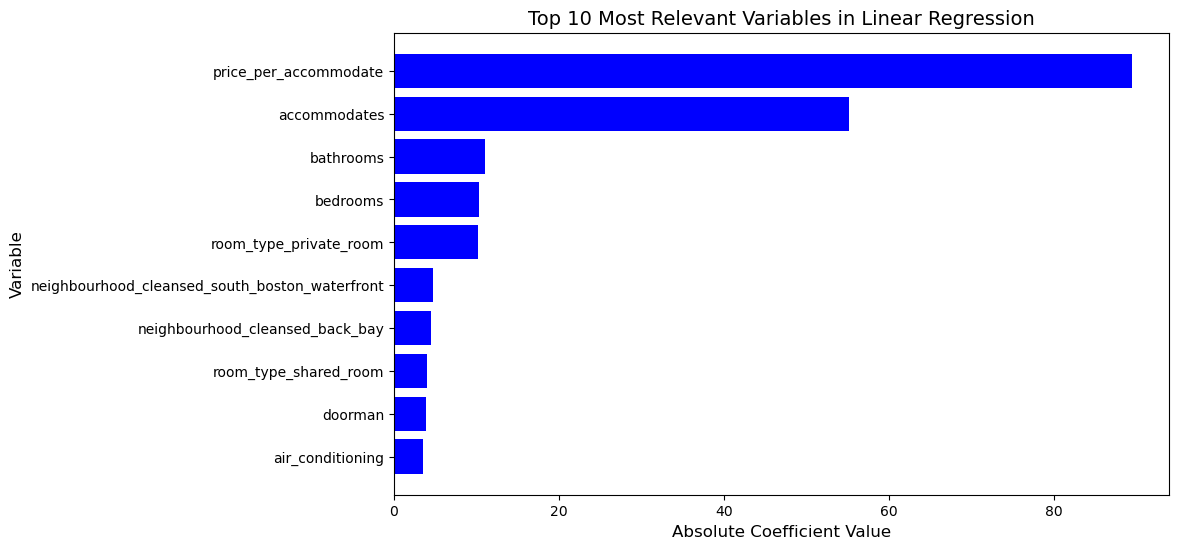

In [79]:
# Get the coefficients
coefficients = pd.DataFrame({
    'Variable': X_train_scaled_df.columns,  # Use the columns of the scaled DataFrame
    'Coefficient': lm_model.coef_
})

# Add a column for the absolute values of the coefficients
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()

# Sort the variables by their absolute coefficient values in descending order
coefficients = coefficients.sort_values(by = 'Absolute_Coefficient', ascending = False)

# Plot a horizontal bar chart of the top 10 most relevant variables
plt.figure(figsize = (10, 6))
plt.barh(coefficients['Variable'].head(10), coefficients['Absolute_Coefficient'].head(10), color = 'blue')
plt.xlabel('Absolute Coefficient Value', fontsize = 12)
plt.ylabel('Variable', fontsize = 12)
plt.title('Top 10 Most Relevant Variables in Linear Regression', fontsize = 14)
plt.gca().invert_yaxis()  # Invert the y-axis to place the most relevant variables at the top
plt.show()

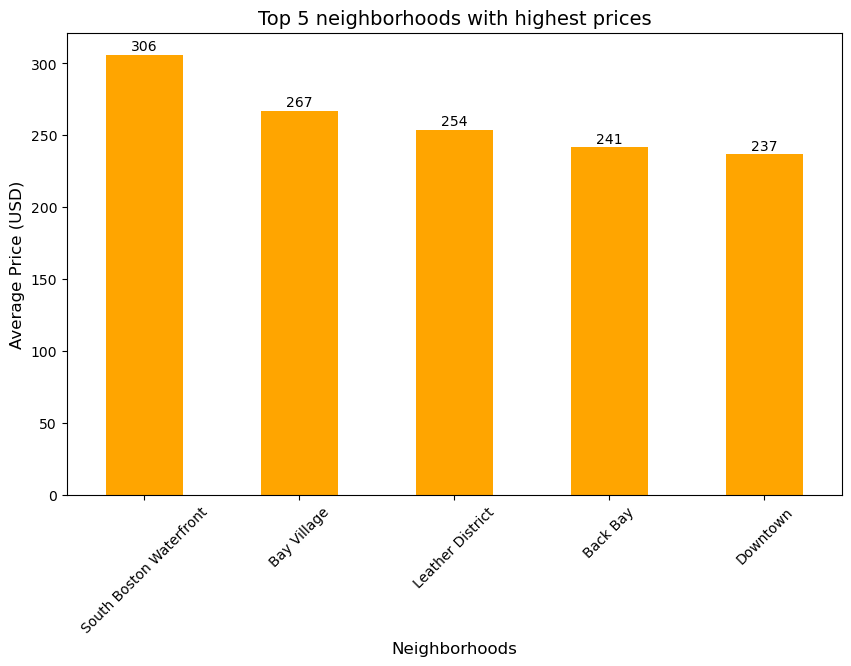

In [80]:
# Average Price by neighborhoods
avg_price_by_neighbourhood = listings_pre_dummies.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)

avg_price_by_neighbourhood.head(5).plot(kind = 'bar', color = 'orange', figsize = (10, 6))
plt.title('Top 5 neighborhoods with highest prices', fontsize = 14)
plt.xlabel('Neighborhoods', fontsize = 12)
plt.ylabel('Average Price (USD)', fontsize = 12)

for i, v in enumerate(avg_price_by_neighbourhood.head(5)):
    plt.text(i, v + 3, f'{v:.0f}', ha = 'center', fontsize = 10)

plt.xticks(rotation = 45)
plt.show()

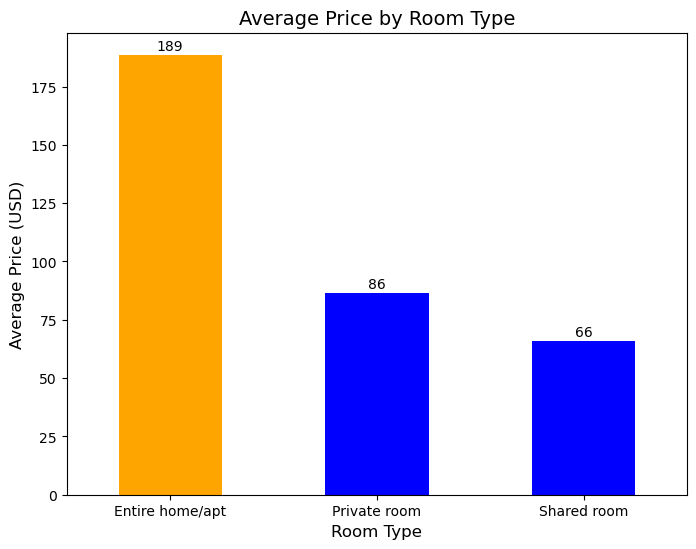

In [81]:
# Average Price by room type
avg_price_by_room_type = listings_pre_dummies.groupby('room_type')['price'].mean().sort_values(ascending=False)

avg_price_by_room_type.plot(kind = 'bar', color=['orange', 'blue', 'blue'], figsize = (8, 6))
plt.title('Average Price by Room Type', fontsize = 14)
plt.xlabel('Room Type', fontsize = 12)
plt.ylabel('Average Price (USD)', fontsize = 12)

for i, v in enumerate(avg_price_by_room_type):
    plt.text(i, v + 2, f'{v:.0f}', ha = 'center', fontsize = 10, color = 'black')

plt.xticks(rotation = 0)
plt.show()

## What are the most valued amenity combinations, considering average price and high demand?

In [83]:
def create_combinations(df, column_to_combine, combinations_number, available_days, demand_percentile):
    """
    Creates and analyzes combinations of items from a specified column in a DataFrame.

    INPUT:
    df: pandas.DataFrame
        The input DataFrame containing the data to analyze.
    column_to_combine: str
        The name of the column containing lists from which combinations will be generated.
    combinations_number: int
        The number of items to include in each combination (e.g., 2 for pairs, 3 for triplets).
    available_days: int
        The threshold for maximum average availability to consider a combination as high demand.
    demand_percentile: float
        The quantile (0-1 range) for price threshold. Only combinations with average prices
        above this percentile will be included in the results.

    OUTPUT:
    pandas.DataFrame
        A DataFrame containing the combinations that meet the criteria, with their 
        corresponding average price and availability.
    """

    # Step 1: Generate combinations for the specified column
    # Creates a new column with all possible combinations of the specified length (combinations_number)
    df['column_combinations'] = df[column_to_combine].apply(lambda row: list(combinations(row, combinations_number)))

    # Step 2: Explode the combinations column
    # Transform the list of combinations into individual rows for easier aggregation
    combinations_exploded = df.explode('column_combinations')

    # Step 3: Calculate metrics for each combination
    # Calculate the mean price for each unique combination
    mean_price = combinations_exploded.groupby('column_combinations')['price'].mean()
    
    # Calculate the mean availability for each unique combination
    mean_availability = combinations_exploded.groupby('column_combinations')['availability_365'].mean()

    # Step 4: Filter combinations based on criteria
    # Create a new DataFrame with the aggregated metrics
    df_combine = pd.DataFrame({'Average Price': mean_price, 'Average Availability': mean_availability})

    # Apply filters:
    # - Combinations with price above the specified percentile
    # - Combinations with availability below the specified threshold (high demand)
    df_combine = df_combine[(df_combine['Average Price'] > np.quantile(mean_price, demand_percentile)) & (df_combine['Average Availability'] < available_days)]

    # Step 5: Sort combinations by price in descending order
    df_combine = df_combine.sort_values(by = 'Average Price', ascending = False)
    
    return df_combine

In [84]:
def top_combinations(df_combinations, variable_name, top_number):
    """
    Plots the top combinations of a variable, displaying both average price (bars) and demand (line).

    INPUT:
    df_combinations - pandas DataFrame containing:
        - 'Average Price': The average price associated with each combination.
        - 'Average Availability': The average availability (in days) for each combination.
    variable_name - str, the name of the variable being analyzed (e.g., 'Amenity').
    top_number - int, the number of top combinations 

    OUTPUT:
    A bar and line chart:
        - Bars represent the average price for the top combinations.
        - A line represents the average availability for the same combinations.
    """
    # Step 1: Select the top combinations based on their price
    top = df_combinations.head(top_number)
    
    # Step 2: Convert the index (combinations) to strings for compatibility with Matplotlib
    top.index = top.index.map(str)
    
    # Step 3: Create the primary axis for average price (bars)
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(
        top.index,                      
        top['Average Price'],          
        color='blue',
        alpha=0.7,
        label='Average Price'
    )
    ax1.set_xlabel(f'{variable_name} Combinations', fontsize = 14)
    ax1.set_ylabel('Average Price', color = 'blue', fontsize = 12)
    ax1.tick_params(axis = 'y', labelcolor = 'blue')
    ax1.set_xticklabels(top.index, rotation = 90)
    
    # Step 4: Create the secondary axis for average availability (line)
    ax2 = ax1.twinx()
    ax2.plot(
        top.index,                     
        top['Average Availability'],
        color='orange', 
        marker='o',
        label='Average Availability'
    )
    ax2.set_ylabel('Average Availability (Days)', color='orange', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Step 5: Add a title and layout adjustments
    plt.title(f'High Value {variable_name} Combinations (Price and Demand)', fontsize = 14)
    fig.tight_layout()
    plt.show()

In [85]:
amenities_combinations = create_combinations(new_listings, 'cleaned_amenities', 3, 100, 0.75).head(10)

C:\Users\raissa.monteiro\AppData\Local\Temp\ipykernel_18444\3147425975.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top.index, rotation = 90)


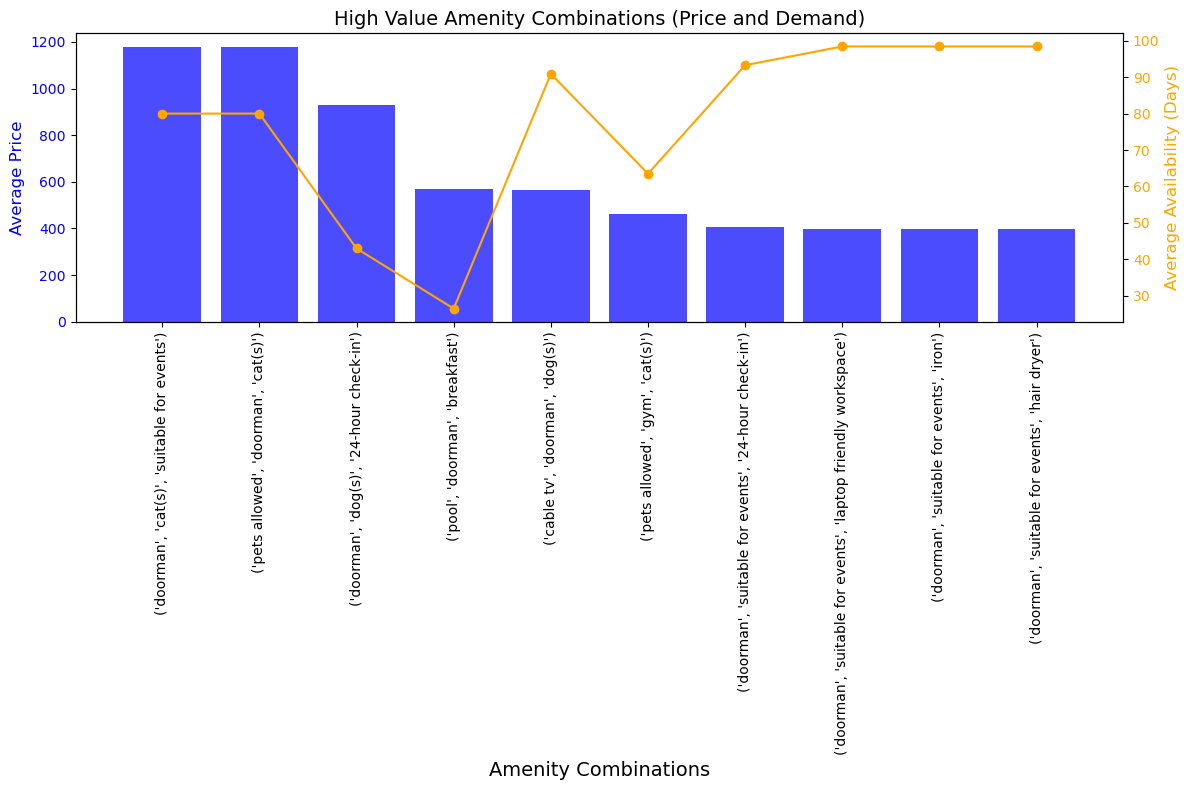

In [86]:
top_combinations(amenities_combinations, 'Amenity', 10)

## How do guest preferences for amenities differ between properties with high ratings and low ratings in Seattle and Boston?

In [88]:
def comparison_amenities(df, high_value, score_column):
    """
    Compare the frequency of amenities between high-rated and low-rated properties.

    Args:
    df (DataFrame): The input dataset containing information about properties and their amenities.
    high_value (numeric): The threshold value to distinguish high-rated from low-rated properties.
    score_column (str): The name of the column containing the score/rating values.

    Returns:
    DataFrame: A DataFrame with the normalized frequency of amenities for high-rated and low-rated properties,
               and the difference between these frequencies.
    """
    # Divide the dataset into high-rated and low-rated properties based on the score threshold
    high_rated = df[df[score_column] >= high_value]  # Properties with ratings greater than or equal to the threshold
    low_rated = df[df[score_column] < high_value]   # Properties with ratings below the threshold

    # Calculate the normalized frequency of amenities for high-rated properties
    # 'explode' transforms the list of amenities in each row into individual rows for counting
    high_rated_amenities = high_rated.explode('cleaned_amenities')['cleaned_amenities'].value_counts(normalize=True)

    # Calculate the normalized frequency of amenities for low-rated properties
    low_rated_amenities = low_rated.explode('cleaned_amenities')['cleaned_amenities'].value_counts(normalize=True)

    # Create a DataFrame to compare amenities between high-rated and low-rated properties
    amenity_comparison = pd.DataFrame({
        'High Rated': high_rated_amenities,  # Frequency of amenities in high-rated properties
        'Low Rated': low_rated_amenities    # Frequency of amenities in low-rated properties
    }).fillna(0)  # Fill missing values with 0 (amenities not present in one of the groups)

    # Add a column for the difference in frequencies between high-rated and low-rated properties
    amenity_comparison['Difference'] = amenity_comparison['High Rated'] - amenity_comparison['Low Rated']

    p_values = []
    for amenity in amenity_comparison.index:
        high_count = high_rated.explode('cleaned_amenities')['cleaned_amenities'].value_counts().get(amenity, 0)
        low_count = low_rated.explode('cleaned_amenities')['cleaned_amenities'].value_counts().get(amenity, 0)
        
        # Construct contingency table
        contingency_table = [[high_count, low_count],
                             [len(high_rated) - high_count, len(low_rated) - low_count]]
        
        # Perform chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values.append(p)

    # Add p-values to DataFrame
    amenity_comparison['p-value'] = p_values

    # Drop amenity without a name
    amenity_comparison = amenity_comparison.drop(index = '')
    
    return amenity_comparison

In [89]:
# Compare the frequency of amenities between high-rated and low-rated properties
# The 'comparison_amenities' function calculates the frequency, difference, and statistical significance (p-value) for each amenity
amenity_comparison = comparison_amenities(new_listings, 8.5, 'review_scores_value')

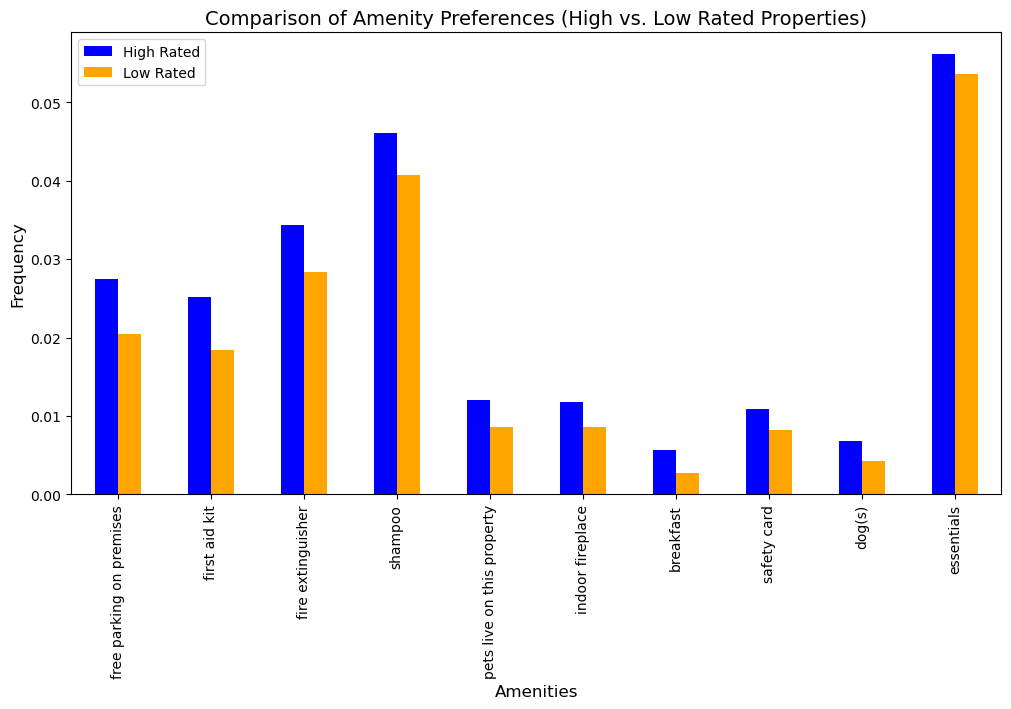

In [90]:
# Select the top 10 amenities with the largest differences in frequency between high-rated and low-rated properties
# Sorting the DataFrame by the 'Difference' column in descending order to find the most significant differences
top_differences = amenity_comparison.sort_values('Difference', ascending = False).head(10)

# Plot a bar chart comparing the frequencies of the top 10 amenities
# This shows how much more frequently these amenities appear in high-rated vs. low-rated properties
top_differences[['High Rated', 'Low Rated']].plot(kind = 'bar', figsize = (12, 6), color = ['blue','orange'])

# Add a title
plt.title('Comparison of Amenity Preferences (High vs. Low Rated Properties)', fontsize = 14)

# Label the axis
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Amenities', fontsize = 12)

# Display the chart
plt.show()

In [91]:
# Filter the top differences to retain only those with a statistically significant difference (p-value < 0.05)
top_significant_differences = top_differences[top_differences['p-value'] < 0.05]
top_significant_differences

,High Rated,Low Rated,Difference,p-value
cleaned_amenities,,,,
free parking on premises,0.027404,0.020482,0.006922,4.607210e-11
first aid kit,0.025195,0.018423,0.006772,1.190009e-10
fire extinguisher,0.034395,0.028304,0.006092,2.991148e-10
shampoo,0.046110,0.040655,0.005456,1.425386e-12
pets live on this property,0.012050,0.008543,0.003508,3.854213e-05
indoor fireplace,0.011745,0.008646,0.003099,1.765106e-04
breakfast,0.005680,0.002676,0.003004,1.100505e-05
safety card,0.010837,0.008234,0.002603,8.961840e-04
dog(s),0.006814,0.004323,0.002491,4.077465e-04


In [92]:
# Check if the significant differences are the same as the top differences
# This verifies whether the top differences are statistically significant
top_significant_differences.index == top_differences.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [93]:
amenity_comparison_Seattle = comparison_amenities(new_listings[new_listings['city'] == 'Seattle'], 8.5, 'review_scores_value')
amenity_comparison_Boston = comparison_amenities(new_listings[new_listings['city'] == 'Boston'], 8.5, 'review_scores_value')

In [94]:
top_differences_Seattle = amenity_comparison_Seattle.sort_values('Difference', ascending = False).head(10)
top_differences_Boston = amenity_comparison_Boston.sort_values('Difference', ascending = False).head(10)

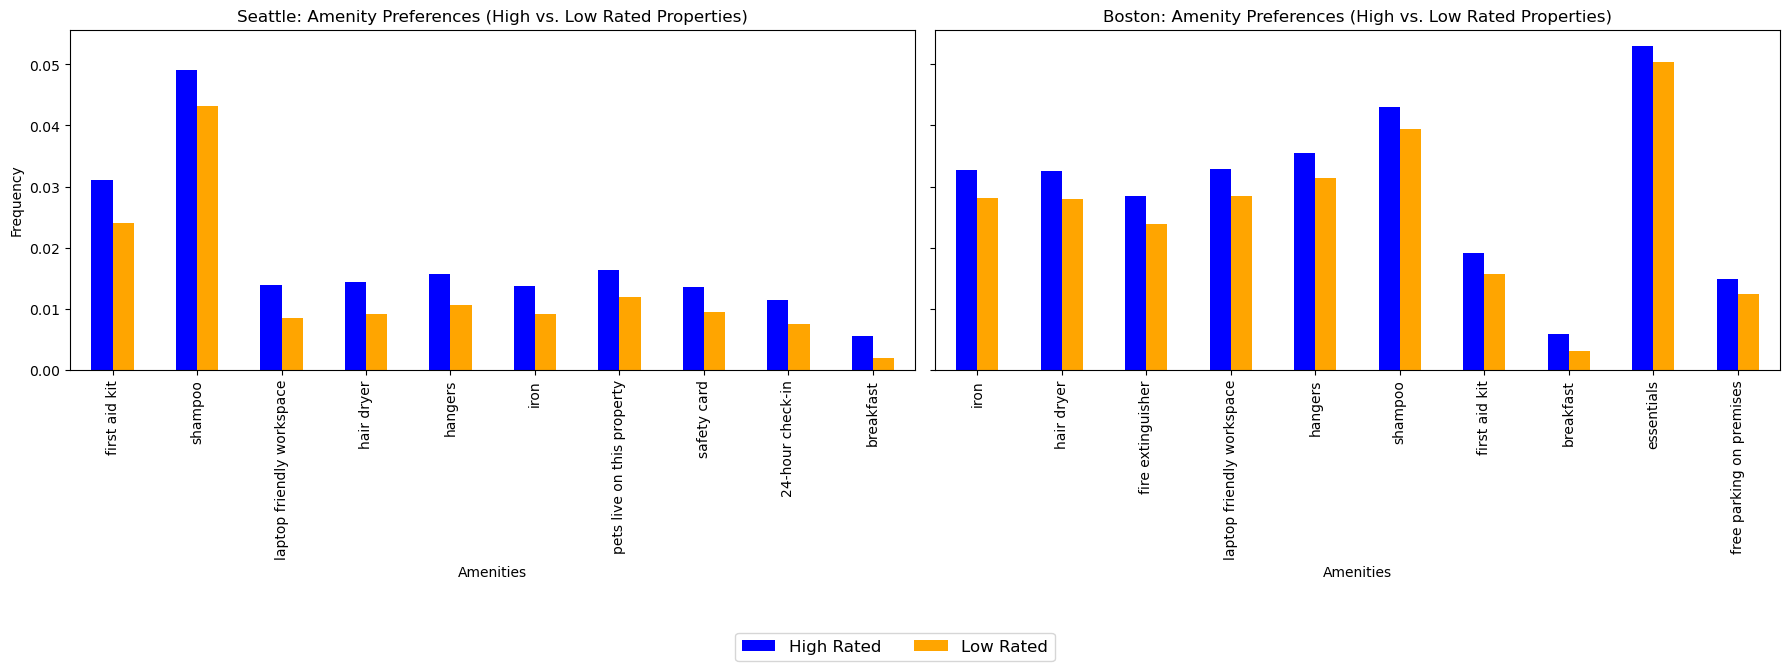

In [95]:
# Create a figure with two subplots placed side by side
# figsize controls the overall dimensions of the figure
# sharey ensures both plots share the same y-axis scale for easy comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# First Graphic: Seattle
# Plot the top differences in amenity preferences for Seattle
top_differences_Seattle[['High Rated', 'Low Rated']].plot(
    kind='bar', ax = axes[0], legend = False, color = ['blue','orange']
)
axes[0].set_title('Seattle: Amenity Preferences (High vs. Low Rated Properties)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Amenities')
axes[0].tick_params(axis = 'x', rotation = 90)

# Second Graphic: Boston
# Plot the top differences in amenity preferences for Boston
top_differences_Boston[['High Rated', 'Low Rated']].plot(
    kind = 'bar', ax = axes[1], legend = False, color = ['blue','orange']
)
axes[1].set_title('Boston: Amenity Preferences (High vs. Low Rated Properties)')
axes[1].set_xlabel('Amenities')
axes[1].tick_params(axis = 'x', rotation = 90)

# Add a legend to the figure
# loc specifies the position of the legend ('upper center' positions it above both subplots)
# bbox_to_anchor adjusts the position of the legend box relative to the figure
# ncol = 2 organizes the legend entries in two columns
fig.legend(
    ['High Rated', 'Low Rated'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol = 2, fontsize = 12
)

# Adjust the layout to prevent overlapping of subplots and labels
plt.tight_layout()

# Display the plots
plt.show()

In [96]:
top_significant_differences_Seattle = top_differences_Seattle[top_differences_Seattle['p-value'] < 0.05]
top_significant_differences_Boston = top_differences_Boston[top_differences_Boston['p-value'] < 0.05]

In [97]:
# Check if the significant differences are the same as the top differences
# This verifies whether the top differences are statistically significant
print(top_significant_differences_Seattle.index == top_differences_Seattle.index)
print(top_significant_differences_Boston.index == top_differences_Boston.index)

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
